
关于 VanOsta2024 模型或者 CircAdapt 模型的介绍，可参考：
- Arts et al. (2005): https://doi.org/10.1152/ajpheart.00444.2004
- Lumens et al. (2009): https://doi.org/10.1007/s10439-009-9774-2
- Walmsley et al. (2015): https://doi.org/10.1371/journal.pcbi.1004284

![](https://framework.circadapt.org/latest/_images/circadapt.jpg)

CircAdapt Framework 目前只能在 windows 中使用, 通过下面方式安装：

```
pip install .\CircAdapt-2412-py3-none-win_amd64.whl
```

In [17]:
from circadapt import VanOsta2024
model = VanOsta2024()
model['Solver']['store_beats'] = 10
components = model.components
print('Components of this model: \n', components)

Components of this model: 
 ['ArtVen', 'Bag', 'Cavity', 'Chamber', 'Connector', 'General', 'Node', 'PFC', 'Patch', 'Solver', 'Timings', 'TriSeg', 'Tube0D', 'Valve', 'Wall']


一个模型通常包含以下部分：
- atrial and ventricular cavities, with intraventricular septum, 
- atrioventricular and ventriculoarterial valves, 
- major blood vessels, 
- both pulmonary and systemic vasculature and the pericardium.

每个部分可能包含：
- Parameters：these values can be changed according to the pathology you are interested in
- Signals：these are the resulting signals after the model has simulated a heartbeat, which can be retrieved from the model
- Objects：here, the objects are listed to which the parameters and signals correspond, i.e. the first value of a parameter corresponds to the first object

例如Valve(瓣膜)包含：

In [18]:
# Access the Valve component and show the parameters, signals and objects for this component

print('The Valve component contains the following: \n', model['Valve'])

The Valve component contains the following: 
 <Valve> 
parameters: 
 ['adaptation_A_open_fac', 'A_open', 'A_leak', 'l', 'L_fac_prox', 'L_fac_dist', 'L_fac_valve', 'rho_b', 'papillary_muscles', 'papillary_muscles_slope', 'papillary_muscles_min', 'papillary_muscles_A_open_fac', 'soft_closure', 'fraction_A_open_Aext', 'prox', 'dist']

 signals: 
 ['q', 'dq_dt', 'L', 'A', 'Dp', 'DpB', 'diast']

 objects: 
 ['Model.Peri.SyVenRa', 'Model.Peri.RaRv', 'Model.Peri.RvPuArt', 'Model.Peri.PuVenLa', 'Model.Peri.LaLv', 'Model.Peri.LvSyArt']
<\Valve>


从中获取获取数据，例如瓣膜的有效开口面积：

In [19]:
# We can obtain all orifice areas 
print('Effective orifice areas for each valve: \n', model['Valve']['A_open'], '\n')

# or we can obtain a specific orifice area, for example the aortic valve (object 'LvSyArt' --> valve between the LV and the systemic arteries)
print('Effective orifice area for the aortic valve: \n', model['Valve']['A_open']['LvSyArt'], '\n')

print('Note that the aortic valve (6th object) corresponds to the 6th position within A_open')

Effective orifice areas for each valve: 
 array([0.00049916, 0.00047155, 0.00047155, 0.00050805, 0.00049835,
       0.00049835]) 

Effective orifice area for the aortic valve: 
 0.00049835 

Note that the aortic valve (6th object) corresponds to the 6th position within A_open


血流动力学数据在模型运行之后获得，下面的代码分别是运行五个周期或者运行到稳态。

In [20]:
model.run(5)
# model.run(stable=True)

# 画图 

从模型的Cavity部件获取如下信息：
- Pressures of the LV, LA, aorta and RV
- Volumes of the LV, LA and RV
- Time

In [21]:
# get volume and pressure of LV
V_lv = model['Cavity']['V'][:, 'cLv']*1e6
p_lv = model['Cavity']['p'][:, 'cLv']*7.5e-3

# get volume and pressure of LA
V_la = model['Cavity']['V'][:, 'La']*1e6
p_la = model['Cavity']['p'][:, 'La']*7.5e-3

# get volume and pressure of RV
V_rv = model['Cavity']['V'][:, 'cRv']*1e6
p_rv = model['Cavity']['p'][:, 'cRv']*7.5e-3

# get aortic pressure
p_ao = model['Cavity']['p'][:, 'SyArt']*7.5e-3

# get time
time = model['Solver']['t']*1e3

# if in doubt about the exact naming of the cavity objects, use:
print('Check exact names of the objects: \n', model['Cavity'].objects)

# you can also obtain multiple signals at the same time, after which you can split the two pressure signals into two parameters 
# using the following lines. First transpose the pressure such that the first axis sets the signals

pressure = model['Cavity']['p'][:, ['cLv', 'cRv']]*7.5e-3
p_lv, p_rv = pressure.T

Check exact names of the objects: 
 ['Model.SyArt', 'Model.SyVen', 'Model.PuArt', 'Model.PuVen', 'Model.Peri', 'Model.Peri.La', 'Model.Peri.Ra', 'Model.Peri.TriSeg.cLv', 'Model.Peri.TriSeg.cRv']


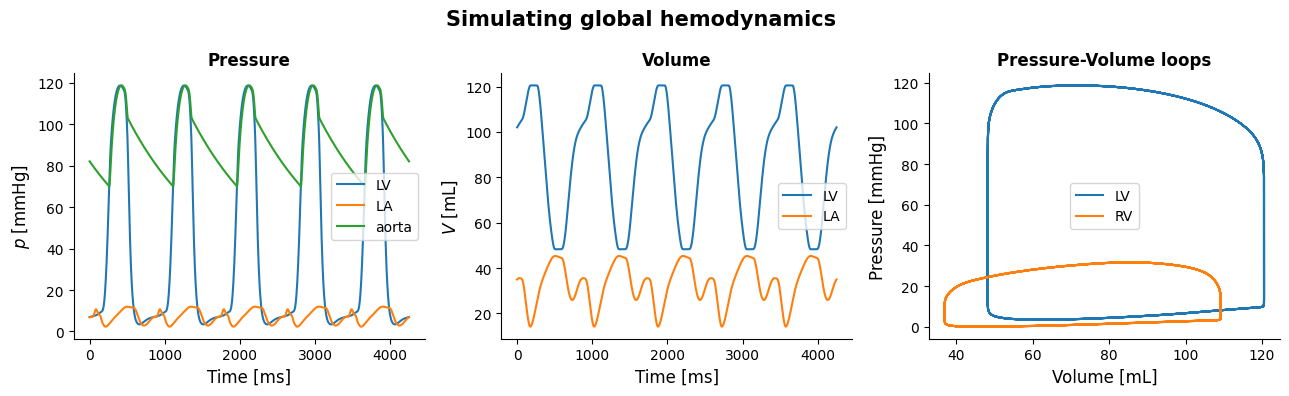

In [22]:
# Plot data
fig = plt.figure(1, figsize=(13, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Plot pressures
ax1.plot(time, p_lv, label = 'LV')
ax1.plot(time, p_la, label = 'LA')
ax1.plot(time, p_ao, label = 'aorta')
ax1.legend()

# Plot volumes
ax2.plot(time, V_lv, label = 'LV')
ax2.plot(time, V_la, label = 'LA')
ax2.legend()

# Plot PV loops
ax3.plot(V_lv, p_lv, label = 'LV')
ax3.plot(V_rv, p_rv, label = 'RV')
ax3.legend()

# plot design, add labels
for ax in [ax1, ax2, ax3]:
    ax.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('Time [ms]', fontsize=12)
ax2.set_xlabel('Time [ms]', fontsize=12)
ax3.set_xlabel('Volume [mL]', fontsize=12)

ax1.set_ylabel('$p$ [mmHg]', fontsize=12)
ax2.set_ylabel('$V$ [mL]', fontsize=12)
ax3.set_ylabel('Pressure [mmHg]', fontsize=12)

ax1.set_title('Pressure',
             fontsize=12, fontweight='bold')
ax2.set_title('Volume',
             fontsize=12, fontweight='bold')
ax3.set_title('Pressure-Volume loops',
             fontsize=12, fontweight='bold')

fig.suptitle('Simulating global hemodynamics ',
             fontsize=15, fontweight='bold')

plt.tight_layout()
plt.draw()